# 作業 : (Kaggle)鐵達尼生存預測
觀察使用log1p降偏態時, 對於分布與迴歸分數的影響


修正區塊中的資料問題後, 觀察以box-cox降偏態, 對於分布與迴歸分數的影響

In [10]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df_train = pd.read_csv(data_path+'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId','Survived'],axis = 1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
num_features = []
for dtype, feature in zip(df.dtypes,df.columns):
    if dtype == 'int64' or dtype == 'float64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric features : {num_features}\n')

df = df[num_features]
df = df.fillna(0)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

5 Numeric features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


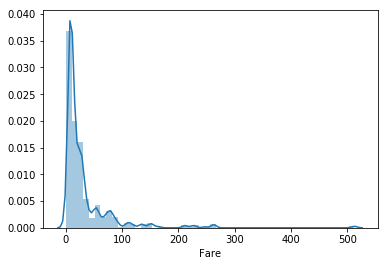

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Fare'][:train_num])
plt.show()

In [13]:
#score
df_mm = MMEncoder.fit_transform(df)
train_X = df_mm[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator,train_X,train_Y,cv =5).mean()

C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: Futu

0.7016289882888318

# 作業1
試著在鐵達尼的票價 (Fare) 欄位中使用對數去偏 (log1p) , 結果是否更好?

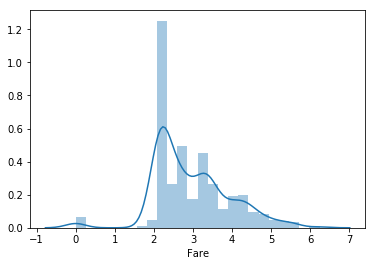

C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: Futu

0.7106367963253961

In [14]:
df_fixed = copy.deepcopy(df)
df_fixed['Fare'] = np.log1p(df_fixed['Fare'])

sns.distplot(df_fixed['Fare'][:train_num])
plt.show()

df_fixed = MMEncoder.fit_transform(df_fixed)
train_X = df_fixed[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator,train_X,train_Y,cv =5).mean()

# 作業2
最後的 boxcox 區塊直接執行會造成錯誤, 起因為輸入值有負值, 請問如何修正後可以使用 boxcox? (Hint : 試圖修正資料)

In [29]:
from scipy import stats
df_fixed2 = copy.deepcopy(df)

In [30]:
df_fixed2['Fare'].describe()

count    1309.000000
mean       33.270043
std        51.747063
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [31]:
df_fixed2['Fare'] = df_fixed2['Fare'] + 0.0000000001

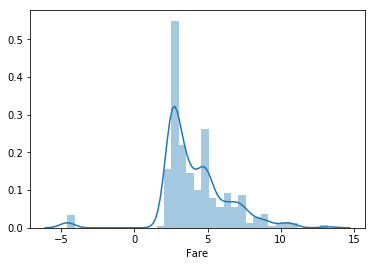

0.7128777811941116


C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jim87\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: Futu

In [32]:
#df_fixed2['Fare'] = stats.boxcox(df_fixed2['Fare'], lmbda=0.15)
df_fixed2['Fare'] = stats.boxcox(df_fixed2['Fare'])[0]#???
sns.distplot(df_fixed2['Fare'][:train_num])
plt.show()

df_fixed2 = MMEncoder.fit_transform(df_fixed2)
train_X = df_fixed2[:train_num]
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())